---
title: "Topics in Econometrics and Data Science: Tutorial 7"

---

#### General Note

You will very likely find the solution to these exercises online. We, however, strongly encourage you to work on these exercises without doing so. Understanding someone else’s solution is very different from coming up with your own. Use the lecture notes and try to solve the exercises independently.

# Section 2: Linear Regression

## Exercise 1: Linear Regression: Prediction

We consider a regression problem where we want to predict our dependent variable $Y$ in terms of the explanatory variable $X$. In this exercise we try to create an optimal prediction of $Y$ given $X$.

### A)

1. Load the [`prediction.csv`](https://alexandragibbon.github.io/StatProg-HHU/data/prediction.csv) data set and assess its structure. \
\
**Hint**: You can use [`pandas.DataFrame.shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) to assess the structure of the data set.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [44]:
path = "C:/Users/Mara Mattes/Dropbox/Data Science in Economics/Lehre/WS24/Statistical Programming/StatProg-HHU-oct24"
os.chdir(path)
# os.chdir("[INSERT YOUR PATH HERE!]")

data = pd.read_csv('data/prediction.csv', sep=',', na_values=".")
data.head()

,x,y
0,1.047198,9.242999
1,1.186824,6.861050
2,1.326450,-2.258883
3,1.466077,3.645338
4,1.605703,5.755031


In [45]:
data.shape 

(49, 2)

2. Generate a scatter plot of the $Y$ values against the $X$ values using [`plt.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html).

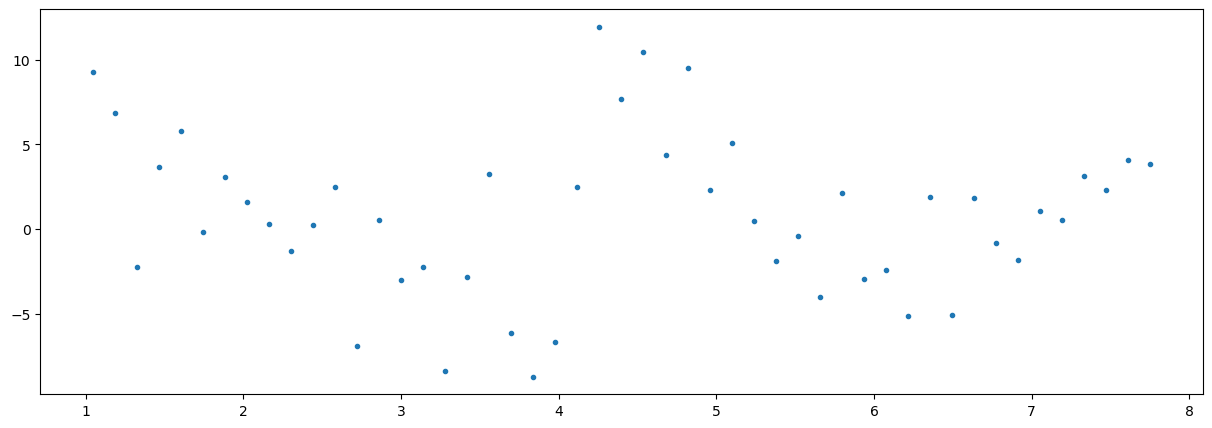

In [46]:
plt.figure(1,figsize=(15,5))
plt.plot(data['x'],data['y'],'.')
plt.show()

### B)

Now, we want to run a linear regression using the [`sklearn`](https://scikit-learn.org/stable/) package and add the regression line to the scatter plot. Then, we compute the in-sample Means Squared Error (MSE) in prediction. \
\
**Hint:** *in-sample* means that we estimate the model and evaluate its performance using the same data.

1. To solve this task, first, save `x` and `y` in two separate data frames using [`pd.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [47]:
x = pd.DataFrame(data, columns=['x'])
y = pd.DataFrame(data, columns=['y'])

2. Run a linear regression using [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html). \
\
**Hint**: First, fit the linear model (`sklearn.linear_model.LinearRegression.fit`) using the entire data set ($X$ and $Y$). Then, use the estimated/fitted linear model to predict $Y$ (`sklearn.linear_model.LinearRegression.predict`) based on the same $X$ data that was used to estimate/fit the model. 

In [85]:
from sklearn.linear_model import LinearRegression
linmod = LinearRegression()
linmod.fit(x, y)
ypred_linmod = linmod.predict(x)

3. Add the regression line to the scatter plot created in part A.

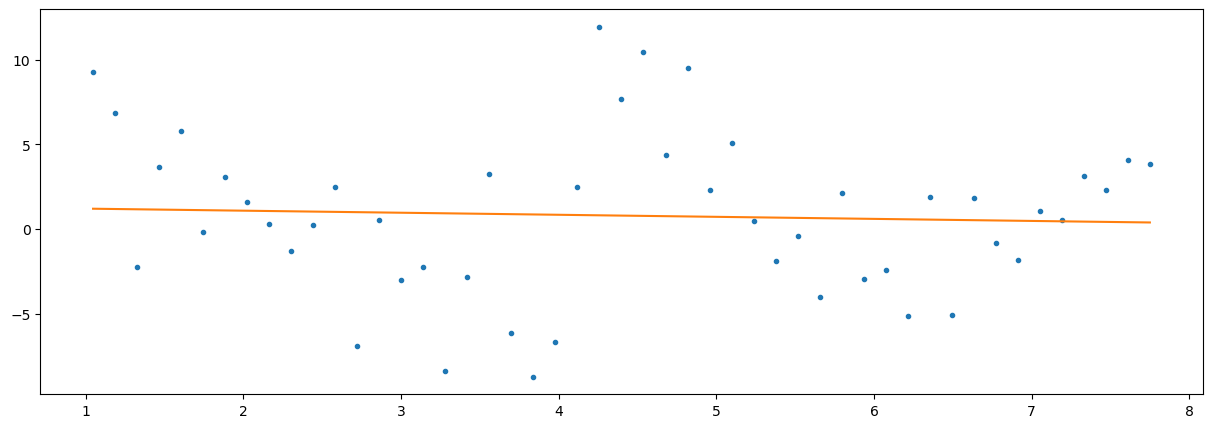

In [49]:
plt.figure(1,figsize=(15,5))
plt.plot(data['x'],data['y'],'.')
plt.plot(data['x'], ypred_linmod)
plt.show()

4. Compute the in-sample MSE in prediction.

In [50]:
MSE_ins = np.mean((ypred_linmod - y)**2)

print("MSE (ins)", MSE_ins)

MSE (ins) 22.15966314172156


### C)

In part C, we evaluate how well the model estimated in part B predicts the new observations provided in the data set `predictiontest.csv`. Compute the out-of-sample MSE in prediction and illustrate your results in the scatter plot. \
\
**Hint:** *out-of-sample* means that the model is estimated using one data set and its performance is evaluated on a different data set.

Load the [`predictiontest.csv`](https://alexandragibbon.github.io/StatProg-HHU/data/predictiontest.csv) data set:

In [51]:
path = "C:/Users/Mara Mattes/Dropbox/Data Science in Economics/Lehre/WS24/Statistical Programming/StatProg-HHU-oct24"
os.chdir(path)
# os.chdir("[INSERT YOUR PATH HERE!]")

datatest = pd.read_csv('data/predictiontest.csv', sep=',', na_values=".")
datatest.head()

,xtest,ytest
0,1.047198,5.808596
1,1.186824,1.274230
2,1.326450,4.892476
3,1.466077,-3.124069
4,1.605703,6.282259


In [52]:
datatest.shape

(49, 2)

1. First, rename the columns of `datatest` to `x` and `y` using [`pandas.DataFrame.rename`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html#pandas-dataframe-rename).

In [53]:
# ensure that xtest and x have the same column names
datatest.rename(columns={'xtest': 'x',
                        'ytest': 'y'}, inplace=True)

2. Save the columns `x` and `y` in two separate data frames using [`pd.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and name them, e.g., `xtest` and `ytest`.

In [54]:
xtest = pd.DataFrame(datatest, columns=['x'])
ytest = pd.DataFrame(datatest, columns=['y'])

3. Then, generate out-of-sample predictions. For this, use the estimated model from part B and predict the new observations provided in `predictiontest.csv`. \
\
**Hint:** Use `sklearn.linear_model.LinearRegression.predict`.

In [55]:
y_linmod_oos = linmod.predict(xtest)

4. Create a scatter plot showing the test data and the predicted values.

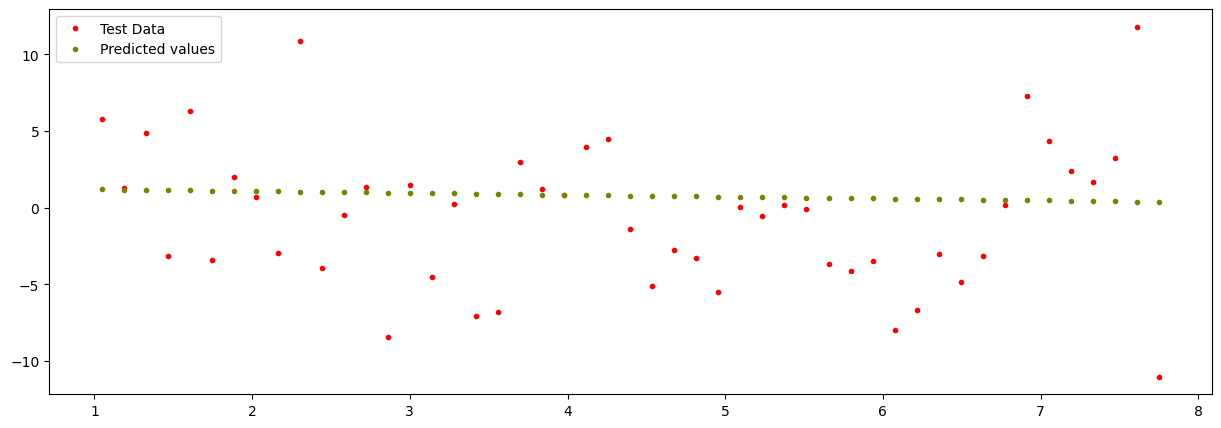

In [56]:
plt.figure(1,figsize=(15,5))
#plt.plot(data['x'],data['y'],'.')
#plt.plot(data['x'], ypred_linmod)
plt.plot(datatest['x'], datatest['y'],'.', color = "red", label = "Test Data")
plt.plot(datatest['x'], y_linmod_oos,'.', color = "olive", label = "Predicted values")
plt.legend()
plt.show()

5. Compute the out-of-sample MSE in prediction.

In [57]:
MSE = np.mean((y_linmod_oos - ytest)**2)

print("MSE basic linear Model: ", MSE)

MSE basic linear Model:  24.3254796898932


### D) 

In part D, we try to improve the predictive performance by including high-order polynomials of the variable $X$ in our regression. Then, we add the predictions from the polynomial model to the scatter plot. \
Do this for both the in-sample predictions and and the out-of-sample predictions.

1. Transform `x` into polynomial features of, e.g., degree $q=5$ using [`sklearn.preprocessing.PolynomialFeatures`](https://scikit-learn.org/0.18/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) and its method `fit_transform`.

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly_q = 5
x_t = PolynomialFeatures(poly_q, include_bias=False).fit_transform(x)

2. Convert your transformed `x` into a data frame using `pandas.DataFrame` and display the first few rows of the transformed data.

In [59]:
x_t = pd.DataFrame(x_t)
x_t.head()

,0,1,2,3,4
0,1.047198,1.096623,1.148381,1.202581,1.259340
1,1.186824,1.408551,1.671702,1.984016,2.354677
2,1.326450,1.759470,2.333850,3.095735,4.106339
3,1.466077,2.149381,3.151156,4.619837,6.773034
4,1.605703,2.578282,4.139955,6.647537,10.673970


3. Then, estimate/fit the model based on your transformed `x` data and `y`.

In [60]:
polymod = LinearRegression()
polymod.fit(x_t, y)

LinearRegression()

4. Generate the in-sample and out-of-sample predictions. \
\
**Hint:** Before you can generate the out-of-sample predictions, you need to generate transformations (i.e. high-order polynomials) for the x-values (`xtest`) of the test sample.

In [61]:
# Generate transformation for the test sample
x_t_test = PolynomialFeatures(poly_q, include_bias=False).fit_transform(xtest)

In [62]:
y_poly_ins = polymod.predict(x_t)
y_poly_oos = polymod.predict(x_t_test)

5. Compute the in-sample and out-of-sample MSE.

In [63]:
MSE_poly_ins = np.mean((y_poly_ins - y)**2)
MSE_poly = np.mean((y_poly_oos - ytest)**2)

print("MSE polyn. Model (in sample): ", MSE_poly_ins)
print("MSE polyn. Model: ", MSE_poly)

MSE polyn. Model (in sample):  16.334817378708205
MSE polyn. Model:  28.101156413118225


6. Add the predictions from the polynomial model to the scatter plot. For this, create two scatter plots: one for the in-sample predictions and one for the out-of-sample predictions. \
\
**Hint:** The first scatter plot shows the train data (based on the data set `prediction.csv`), the in-sample predicted values of the linear model of task B and the in-sample predicted values of the polynomial model. The second scatter plot shows the test data (based on the data set `predictiontest.csv`), the out-of sample predicted values of the linear model of task C and the out-of-sample predicted values of the polynomial model.

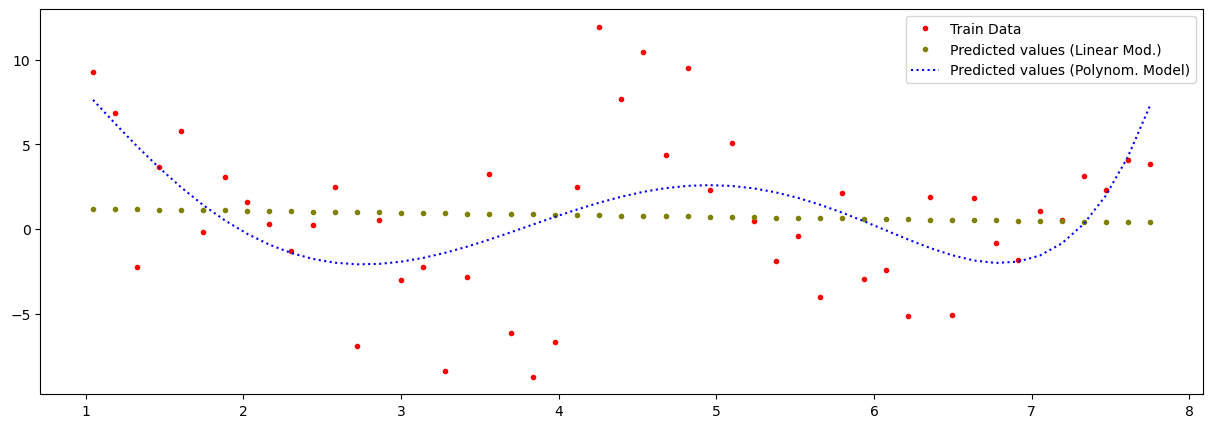

In [64]:
# In sample predictions

plt.figure(1,figsize=(15,5))
#plt.plot(data['x'],data['y'],'.')
#plt.plot(data['x'], ypred_linmod)
plt.plot(data['x'], data['y'],'.', color = "red", label = "Train Data")
plt.plot(data['x'], ypred_linmod,'.', color = "olive", label = "Predicted values (Linear Mod.)")
plt.plot(data['x'], y_poly_ins, linestyle = "dotted", color = "blue", label = "Predicted values (Polynom. Model)")
plt.legend()
plt.show()

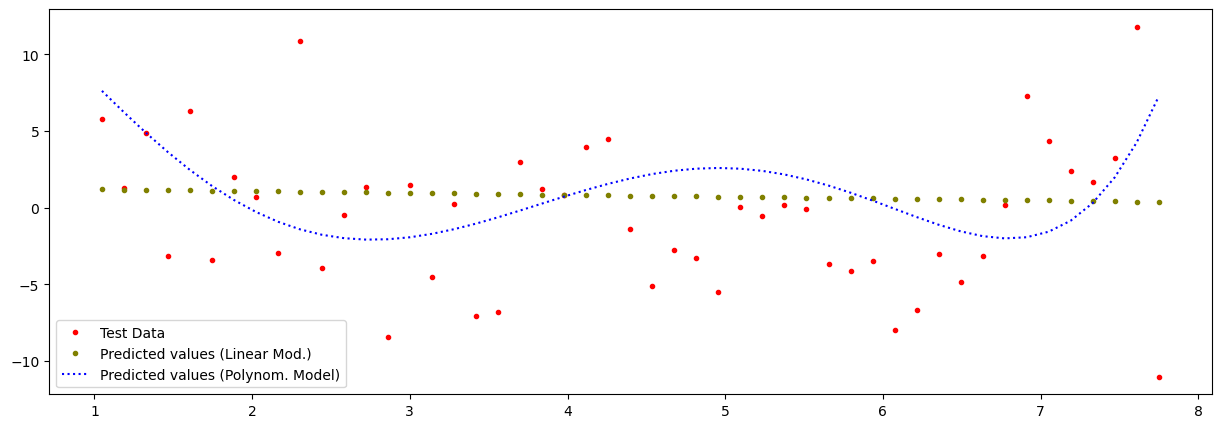

In [65]:
# Out of sample predictions

plt.figure(1,figsize=(15,5))
#plt.plot(data['x'],data['y'],'.')
#plt.plot(data['x'], ypred_linmod)
plt.plot(datatest['x'], datatest['y'],'.', color = "red", label = "Test Data")
plt.plot(datatest['x'], y_linmod_oos,'.', color = "olive", label = "Predicted values (Linear Mod.)")
plt.plot(datatest['x'], y_poly_oos, linestyle = "dotted", color = "blue", label = "Predicted values (Polynom. Model)")
plt.legend()
plt.show()

### E)

Increase the polynomial order in your approximation of the regression curve and see how the in-sample and out-of-sample MSE behave.

In [66]:
x_t_15 = PolynomialFeatures(15, include_bias=False).fit_transform(x)
x_t_15_test = PolynomialFeatures(15, include_bias=False).fit_transform(xtest)

In [67]:
polymod15 = LinearRegression()
polymod15.fit(x_t_15, y)

y_poly_15_ins = polymod15.predict(x_t_15)
y_poly_15_oos = polymod15.predict(x_t_15_test)

MSE_poly_15_ins = np.mean((y_poly_15_ins - y)**2)
MSE_poly_15 = np.mean((y_poly_15_oos - ytest)**2)

print("MSE polyn. Model (in sample): ", MSE_poly_15_ins)
print("MSE polyn. Model: ", MSE_poly_15)

MSE polyn. Model (in sample):  9.90457812413516
MSE polyn. Model:  30.428676987676624


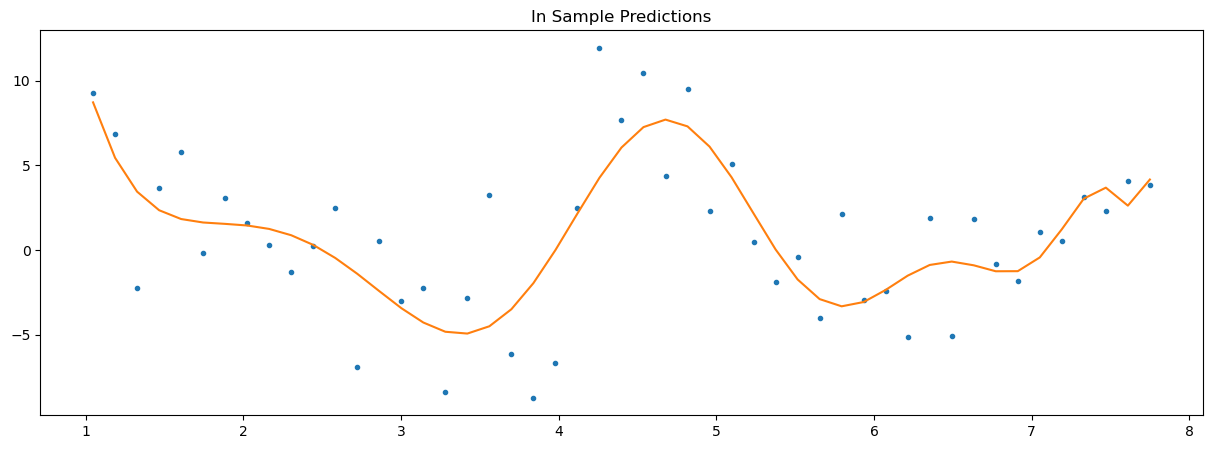

In [68]:
# In sample predictions

plt.figure(1,figsize=(15,5))
plt.plot(data['x'],data['y'],'.')
plt.plot(data['x'], y_poly_15_ins)
plt.title("In Sample Predictions")
plt.show()

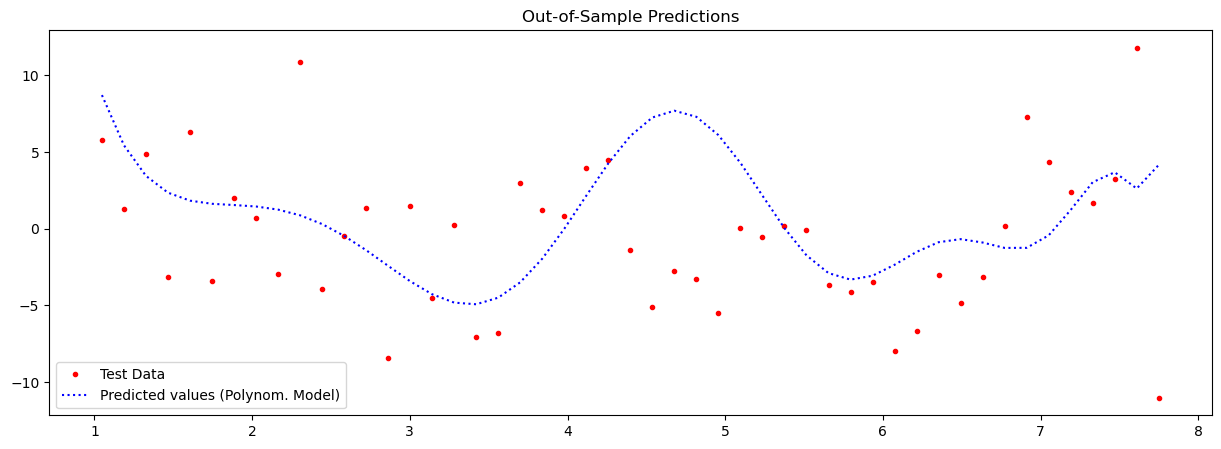

In [69]:
# Out of sample predictions

plt.figure(1,figsize=(15,5))
#plt.plot(data['x'],data['y'],'.')
#plt.plot(data['x'], ypred_linmod)
plt.plot(datatest['x'], datatest['y'],'.', color = "red", label = "Test Data")
plt.plot(datatest['x'], y_poly_15_oos, linestyle = "dotted", color = "blue", label = "Predicted values (Polynom. Model)")
plt.title("Out-of-Sample Predictions")
plt.legend()
plt.show()

### F)

In task F, generate a plot of the in-sample and out-of-sample MSE depending on the order of the polynomial, $q$, in the regression function.

1. First, you need to write a for-loop that iterates over different values of degree $q$ to generate the in-sample and out-of-sample predictions and calculate the in-sample MSE and out-of-sample MSE. Include the following steps in your for-loop: \
\
i. For each value of $q$, generate polynomial features of degree $q$ for both the training data (`x`) and test data (`xtest`). \
ii. Estimate/fit a polynomial model using the polynomial features of degree $q$ on the training data (transformed `x` and `y`). \
iii. Make in-sample and out-of-sample predictions. \
iv. For each value of $q$, compute the in-sample MSE and the out-of-sample MSE.

In [70]:
q = np.arange(1,12,1)
MSE_ins = np.zeros(len(q))
MSE_oos = np.zeros(len(q))

for i in range(0,len(q)):
    x_t = PolynomialFeatures(q[i], include_bias=False).fit_transform(x)
    x_t_test = PolynomialFeatures(q[i], include_bias=False).fit_transform(xtest)
    
    polymod = LinearRegression()
    polymod.fit(x_t, y)
    y_poly_ins = polymod.predict(x_t)
    y_poly_oos = polymod.predict(x_t_test)
    
    MSE_ins[i] = np.mean((y_poly_ins - y)**2)
    MSE_oos[i] = np.mean((y_poly_oos - ytest)**2)
    
    
print("MSE polyn. Model (in sample): ", MSE_ins)
print("MSE polyn. Model: ", MSE_oos)

MSE polyn. Model (in sample):  [22.15966314 21.29031775 20.69472006 17.02803087 16.33481738 14.92459239
 13.2774052  11.3904732  11.22843517 10.76808764 10.1671144 ]
MSE polyn. Model:  [24.32547969 22.40355763 23.28305662 25.86654804 28.10115641 25.74330172
 23.81919807 25.95598496 26.66503597 26.58419726 27.46389181]


2. Finally, generate the plot.

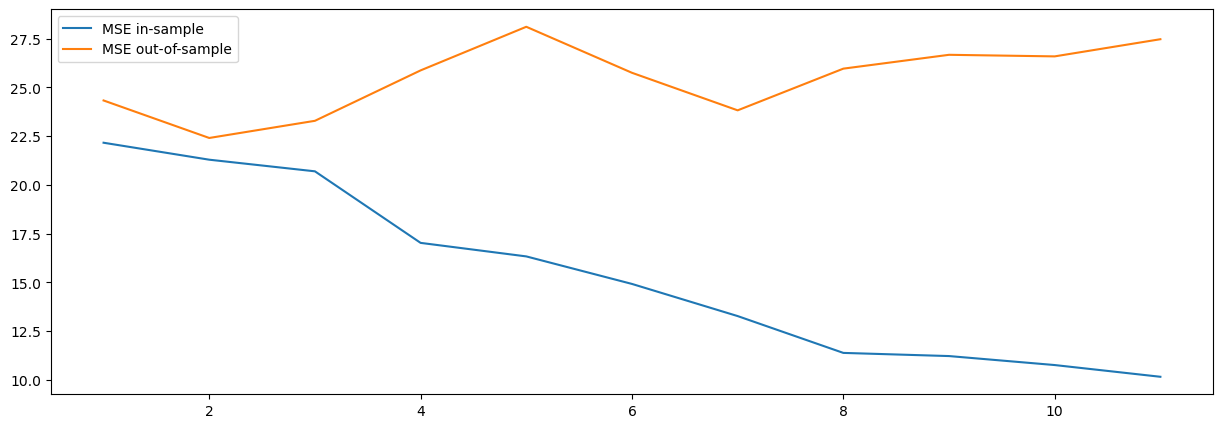

In [71]:
plt.figure(1,figsize=(15,5))
plt.plot(q, MSE_ins, label = "MSE in-sample")
plt.plot(q, MSE_oos, label = "MSE out-of-sample")
plt.legend()
plt.show()

## Exercise 2: Linear Regression: Inference I - Case Study Oregon Health Experiment

In this problem, we analyze a random subset from the Oregon Health Experiment Data ([`Oregon.csv`](https://alexandragibbon.github.io/StatProg-HHU/data/Oregon.csv)). In this large-scale experiment, access to Medicaid (U.S. public health insurance) was provided randomly in a lottery. More information can be found [here](http://www.nber.org/oregon/1.home.html). The problem set is based on the published study by Finkelstein et al. (2012, Quarterly Journal of Economics). 

Load the data and create a pandas data frame.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [73]:
path = "C:/Users/Mara Mattes/Dropbox/Data Science in Economics/Lehre/WS24/Statistical Programming/StatProg-HHU-oct24"
os.chdir(path)
# os.chdir("[INSERT YOUR PATH HERE!]")

Oregdata = pd.read_csv('data/Oregon.csv', sep=',', na_values=".")
Oregdata.head()

,household_id,treatment,english_list,female_list,zip_msa,weight_12m,docvis,hhinc_pctfpl_12m,race_hisp_12m,race_white_12m,...,ddddraXnum_3_3,ddddraXnum_4_2,ddddraXnum_5_2,ddddraXnum_6_2,ddddraXnum_7_2,edu_12m_2,edu_12m_3,edu_12m_4,age2008,chronicdis
0,100002,1,1,1,1,1.0,0,60.054909,0,1,...,0,0,0,0,0,1,0,0,24,0
1,100005,1,0,1,1,1.0,0,129.710540,1,0,...,0,0,0,0,0,1,0,0,39,1
2,100006,1,1,0,1,1.0,1,34.134354,0,1,...,0,0,0,0,0,0,0,1,62,3
3,100009,0,1,1,1,1.0,1,47.788094,0,1,...,0,0,0,0,0,1,0,0,31,0
4,100013,1,1,0,0,1.0,10,11.542013,0,1,...,0,0,0,0,0,1,0,0,45,2


### 1)

Our dependent variable is the number of doctor visits in the last 6 months (`docvis`). Inspect the data set and generate a frequency table for the outcome variable `docvis` as well as a barplot.\
\
**Hint:** For the frequency table use [`pd.crosstab`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) and for the barplot [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

In [74]:
docvis = pd.DataFrame(Oregdata, columns=['docvis'], dtype='int') 
# docvis = Oregdata[['docvis']]
docvis = docvis.values[:]
#type(docvis)

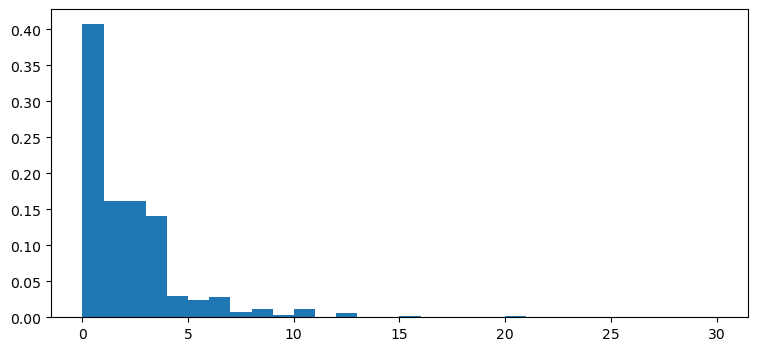

In [75]:
fig = plt.figure(figsize=(9, 4))
plt.hist(docvis, bins = 30, density=True,label='empirical density') # plotting a histogram
plt.show()

In [76]:
pd.crosstab(columns=Oregdata["docvis"], index="count")

docvis,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,22,24,25,27,30
row_0,,,,,,,,,,,,,,,,,,,,,
count,6325,2505,2506,2190,459,363,446,106,169,58,...,7,3,9,4,31,1,4,6,1,8


(+) Boxplot.

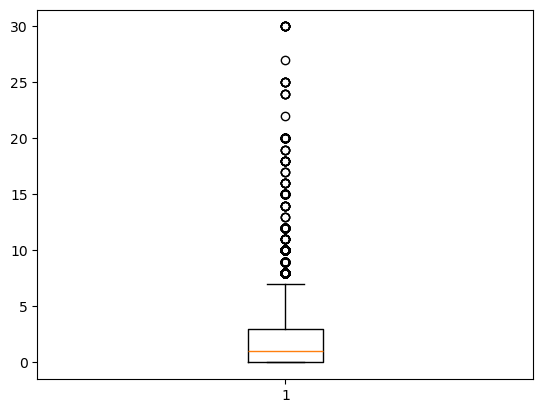

In [77]:
fig = plt.subplots(1,1)[1] 
fig.boxplot(docvis)
plt.show()

### 2) 

We are interested in estimating an intent-to-treatment effect, i.e. how does *access* to Medicaid increase the number of doctor visits. Thus, our regression model is 

$$ DOCVIS_i = \beta_0 + \beta_1 * TREATMENT_i + X_i'\beta + \varepsilon_i,$$

where $DOCVIS_i$ is the number of doctor visits, $TREATMENT_i$ is access to health insurance. The controls $X_i$ contain the variables: 

`dddraw_sur_2 ddddraw_sur_3 ddddraw_sur_4 ddddraw_sur_5 ddddraw_sur_6 ddddraw_sur_7 dddnumhh_li_2 dddnumhh_li_3 ddddraXnum_2_2 ddddraXnum_2_3 ddddraXnum_3_2 ddddraXnum_3_3 ddddraXnum_4_2 ddddraXnum_5_2 ddddraXnum_6_2 ddddraXnum_7_2`

The list with column names that we will need to build the data frame is the following:

In [78]:
columnnames = ['treatment','ddddraw_sur_2', 'ddddraw_sur_3', 'ddddraw_sur_4',
            'ddddraw_sur_5', 'ddddraw_sur_6', 'ddddraw_sur_7', 
            'dddnumhh_li_2', 'dddnumhh_li_3', 'ddddraXnum_2_2', 'ddddraXnum_2_3',
            'ddddraXnum_3_2', 'ddddraXnum_3_3', 'ddddraXnum_4_2',
            'ddddraXnum_5_2', 'ddddraXnum_6_2', 'ddddraXnum_7_2']

In task 2.2, we build the data frame with the relevant variables and then estimate the regression model above using the package [`statsmodels`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS). Is there a significant effect of $TREATMENT_i$, i.e., access to Medicaid?

In [79]:
Oregdata.columns

Index(['household_id', 'treatment', 'english_list', 'female_list', 'zip_msa',
       'weight_12m', 'docvis', 'hhinc_pctfpl_12m', 'race_hisp_12m',
       'race_white_12m', 'race_black_12m', 'ddddraw_sur_2', 'ddddraw_sur_3',
       'ddddraw_sur_4', 'ddddraw_sur_5', 'ddddraw_sur_6', 'ddddraw_sur_7',
       'dddnumhh_li_2', 'dddnumhh_li_3', 'ddddraXnum_2_2', 'ddddraXnum_2_3',
       'ddddraXnum_3_2', 'ddddraXnum_3_3', 'ddddraXnum_4_2', 'ddddraXnum_5_2',
       'ddddraXnum_6_2', 'ddddraXnum_7_2', 'edu_12m_2', 'edu_12m_3',
       'edu_12m_4', 'age2008', 'chronicdis'],
      dtype='object')

In [80]:
columnnames = ['treatment','ddddraw_sur_2', 'ddddraw_sur_3', 'ddddraw_sur_4',
            'ddddraw_sur_5', 'ddddraw_sur_6', 'ddddraw_sur_7', 
            'dddnumhh_li_2', 'dddnumhh_li_3', 'ddddraXnum_2_2', 'ddddraXnum_2_3',
            'ddddraXnum_3_2', 'ddddraXnum_3_3', 'ddddraXnum_4_2',
            'ddddraXnum_5_2', 'ddddraXnum_6_2', 'ddddraXnum_7_2']
X1c = pd.DataFrame(Oregdata, columns=columnnames) 
X1c.head()

,treatment,ddddraw_sur_2,ddddraw_sur_3,ddddraw_sur_4,ddddraw_sur_5,ddddraw_sur_6,ddddraw_sur_7,dddnumhh_li_2,dddnumhh_li_3,ddddraXnum_2_2,ddddraXnum_2_3,ddddraXnum_3_2,ddddraXnum_3_3,ddddraXnum_4_2,ddddraXnum_5_2,ddddraXnum_6_2,ddddraXnum_7_2
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
import statsmodels.api as sm

X1c = sm.add_constant(X1c)
ols1 = sm.OLS(docvis,X1c)
ols1 = ols1.fit(cov_type = "HC3")
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     7.600
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           3.28e-19
Time:                        21:27:27   Log-Likelihood:                -37117.
No. Observations:               15518   AIC:                         7.427e+04
Df Residuals:                   15500   BIC:                         7.441e+04
Df Model:                          17                                         
Covariance Type:                  HC3                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7186      0.083     20.686      0.000       1.556       1.881
treatment          0.2642      0.044      5.962      0.000       0.177       0.351
ddddraw_sur_2      0.1077      0.115      0.938      0.348      -0.117       0.333
ddddraw_sur_3     -0.0597      0.112     -0.535      0.593      -0.278       0.159
ddddraw_sur_4      0.0619      0.107      0.579      0.562      -0.148       0.271
ddddraw_sur_5      0.2266      0.115      1.971      0.049       0.001       0.452
ddddraw_sur_6      0.0996      0.100      0.996      0.319      -0.096       0.296
ddddraw_sur_7      0.0823      0.096      0.854      0.393      -0.107       0.271
dddnumhh_li_2     -0.4005      0.111     -3.616      0.000      -0.618      -0.183
dddnumhh_li_3     -1.0614      0.519     -2.046      0.041      -2.078      -0.044
ddddraXnum_2_2    -0.0148      0.174     -0.085      0.932      -0.355       0.326
ddddraXnum_2_3    -0.0291      0.649     -0.045      0.964      -1.302       1.244
ddddraXnum_3_2     0.3108      0.174      1.790      0.074      -0.030       0.651
ddddraXnum_3_3     0.0770      0.691      0.111      0.911      -1.278       1.432
ddddraXnum_4_2     0.0822      0.159      0.516      0.606      -0.230       0.394
ddddraXnum_5_2    -0.0272      0.166     -0.164      0.870      -0.352       0.298
ddddraXnum_6_2    -0.0645      0.140     -0.460      0.645      -0.339       0.210
ddddraXnum_7_2     0.0685      0.253      0.271      0.787      -0.427       0.564
==============================================================================
Omnibus:                    11508.377   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           261375.559
Skew:                           3.375   Prob(JB):                         0.00
Kurtosis:                      21.939   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

### 3)

Now, we would like to extend the model and include variables on gender, education and race/ethnicity in addition to the regressors from part 2.2

`female_list, hhinc_pctfpl_12m, age2008, edu_12m_2, edu_12m_3, edu_12m_4, english_list, zip_msa, race_white_12m, race_black_12m, race_hisp_12m`

Does your conclusion from part 2.2 change?


In [82]:
X2c = pd.DataFrame(Oregdata, columns=['treatment','female_list', 'hhinc_pctfpl_12m', 'age2008', 'edu_12m_2', 'edu_12m_3',
                                    'edu_12m_4', 'english_list', 'zip_msa', 'race_white_12m', 'race_black_12m',
                                    'race_hisp_12m', 'ddddraw_sur_2', 'ddddraw_sur_3', 'ddddraw_sur_4',
                                      'ddddraw_sur_5', 'ddddraw_sur_6', 'ddddraw_sur_7', 
                                      'dddnumhh_li_2', 'dddnumhh_li_3', 'ddddraXnum_2_2', 'ddddraXnum_2_3',
                                      'ddddraXnum_3_2', 'ddddraXnum_3_3', 'ddddraXnum_4_2',
                                      'ddddraXnum_5_2', 'ddddraXnum_6_2', 'ddddraXnum_7_2']) 
X2c.head()

,treatment,female_list,hhinc_pctfpl_12m,age2008,edu_12m_2,edu_12m_3,edu_12m_4,english_list,zip_msa,race_white_12m,...,dddnumhh_li_2,dddnumhh_li_3,ddddraXnum_2_2,ddddraXnum_2_3,ddddraXnum_3_2,ddddraXnum_3_3,ddddraXnum_4_2,ddddraXnum_5_2,ddddraXnum_6_2,ddddraXnum_7_2
0,1,1,60.054909,24,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,129.710540,39,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,34.134354,62,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,47.788094,31,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,11.542013,45,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [83]:
X2c = sm.add_constant(X2c)
ols2 = sm.OLS(docvis,X2c)
ols2 = ols2.fit(cov_type = "HC3")
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     16.78
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           2.35e-80
Time:                        21:27:28   Log-Likelihood:                -36978.
No. Observations:               15518   AIC:                         7.401e+04
Df Residuals:                   15489   BIC:                         7.424e+04
Df Model:                          28                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2061      0.167      1.235      0.217      -0.121       0.533
treatment            0.2653      0.044      6.031      0.000       0.179       0.352
female_list          0.5031      0.042     12.075      0.000       0.421       0.585
hhinc_pctfpl_12m    -0.0009      0.000     -2.757      0.006      -0.002      -0.000
age2008              0.0141      0.002      7.985      0.000       0.011       0.018
edu_12m_2           -0.0322      0.065     -0.498      0.618      -0.159       0.095
edu_12m_3            0.2103      0.075      2.809      0.005       0.064       0.357
edu_12m_4            0.0874      0.083      1.053      0.292      -0.075       0.250
english_list         0.4937      0.093      5.325      0.000       0.312       0.675
zip_msa             -0.0137      0.049     -0.280      0.780      -0.110       0.082
race_white_12m       0.1687      0.067      2.513      0.012       0.037       0.300
race_black_12m       0.0637      0.117      0.544      0.587      -0.166       0.294
race_hisp_12m        0.1324      0.096      1.373      0.170      -0.057       0.321
ddddraw_sur_2        0.1057      0.114      0.926      0.355      -0.118       0.329
ddddraw_sur_3       -0.0439      0.110     -0.398      0.691      -0.260       0.172
ddddraw_sur_4        0.0627      0.106      0.592      0.554      -0.145       0.270
ddddraw_sur_5        0.2246      0.114      1.968      0.049       0.001       0.448
ddddraw_sur_6        0.1057      0.099      1.068      0.285      -0.088       0.300
ddddraw_sur_7        0.0720      0.095      0.754      0.451      -0.115       0.259
dddnumhh_li_2       -0.2821      0.111     -2.547      0.011      -0.499      -0.065
dddnumhh_li_3       -0.4716      0.356     -1.323      0.186      -1.170       0.227
ddddraXnum_2_2       0.0233      0.174      0.134      0.893      -0.317       0.364
ddddraXnum_2_3      -0.5492      0.499     -1.100      0.271      -1.528       0.429
ddddraXnum_3_2       0.3067      0.172      1.781      0.075      -0.031       0.644
ddddraXnum_3_3      -0.5224      0.590     -0.885      0.376      -1.679       0.634
ddddraXnum_4_2       0.0804      0.158      0.509      0.611      -0.229       0.390
ddddraXnum_5_2      -0.0188      0.165     -0.114      0.909      -0.341       0.304
ddddraXnum_6_2      -0.0562      0.139     -0.403      0.687      -0.329       0.217
ddddraXnum_7_2       0.1313      0.247      0.532      0.595      -0.353       0.616
==============================================================================
Omnibus:                    11551.767   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           268559.029
Skew:                           3.385   Prob(JB):                         0.00
Kurtosis:                      22.223   Cond. N

### 4)

How would you summarize your results? Are the OLS conditions met in the Oregon Health Example? 

* `DOCVIS` is a count variable $\rightarrow$ normality approximation might be questionnable. Asymptotically, confidence bands (etc.) are valid, but not exactly. 